# Question 2

The following function samples a \"biased coin\", which gives the result 0 (heads) with probability p and gives the result 1 (tails) with probability 1-p. Play around with it and try to understand how it works."

In [13]:
from random import random

def biased_coin(p):
    r = random()
    if r < p:
        return 0
    else: 
        return 1

(a) Plot a histogram of 200 realisations of the output of biased_coin() for p=0.3. (Hint: check out the hist function).

P(0) 0.645
P(1) 0.355


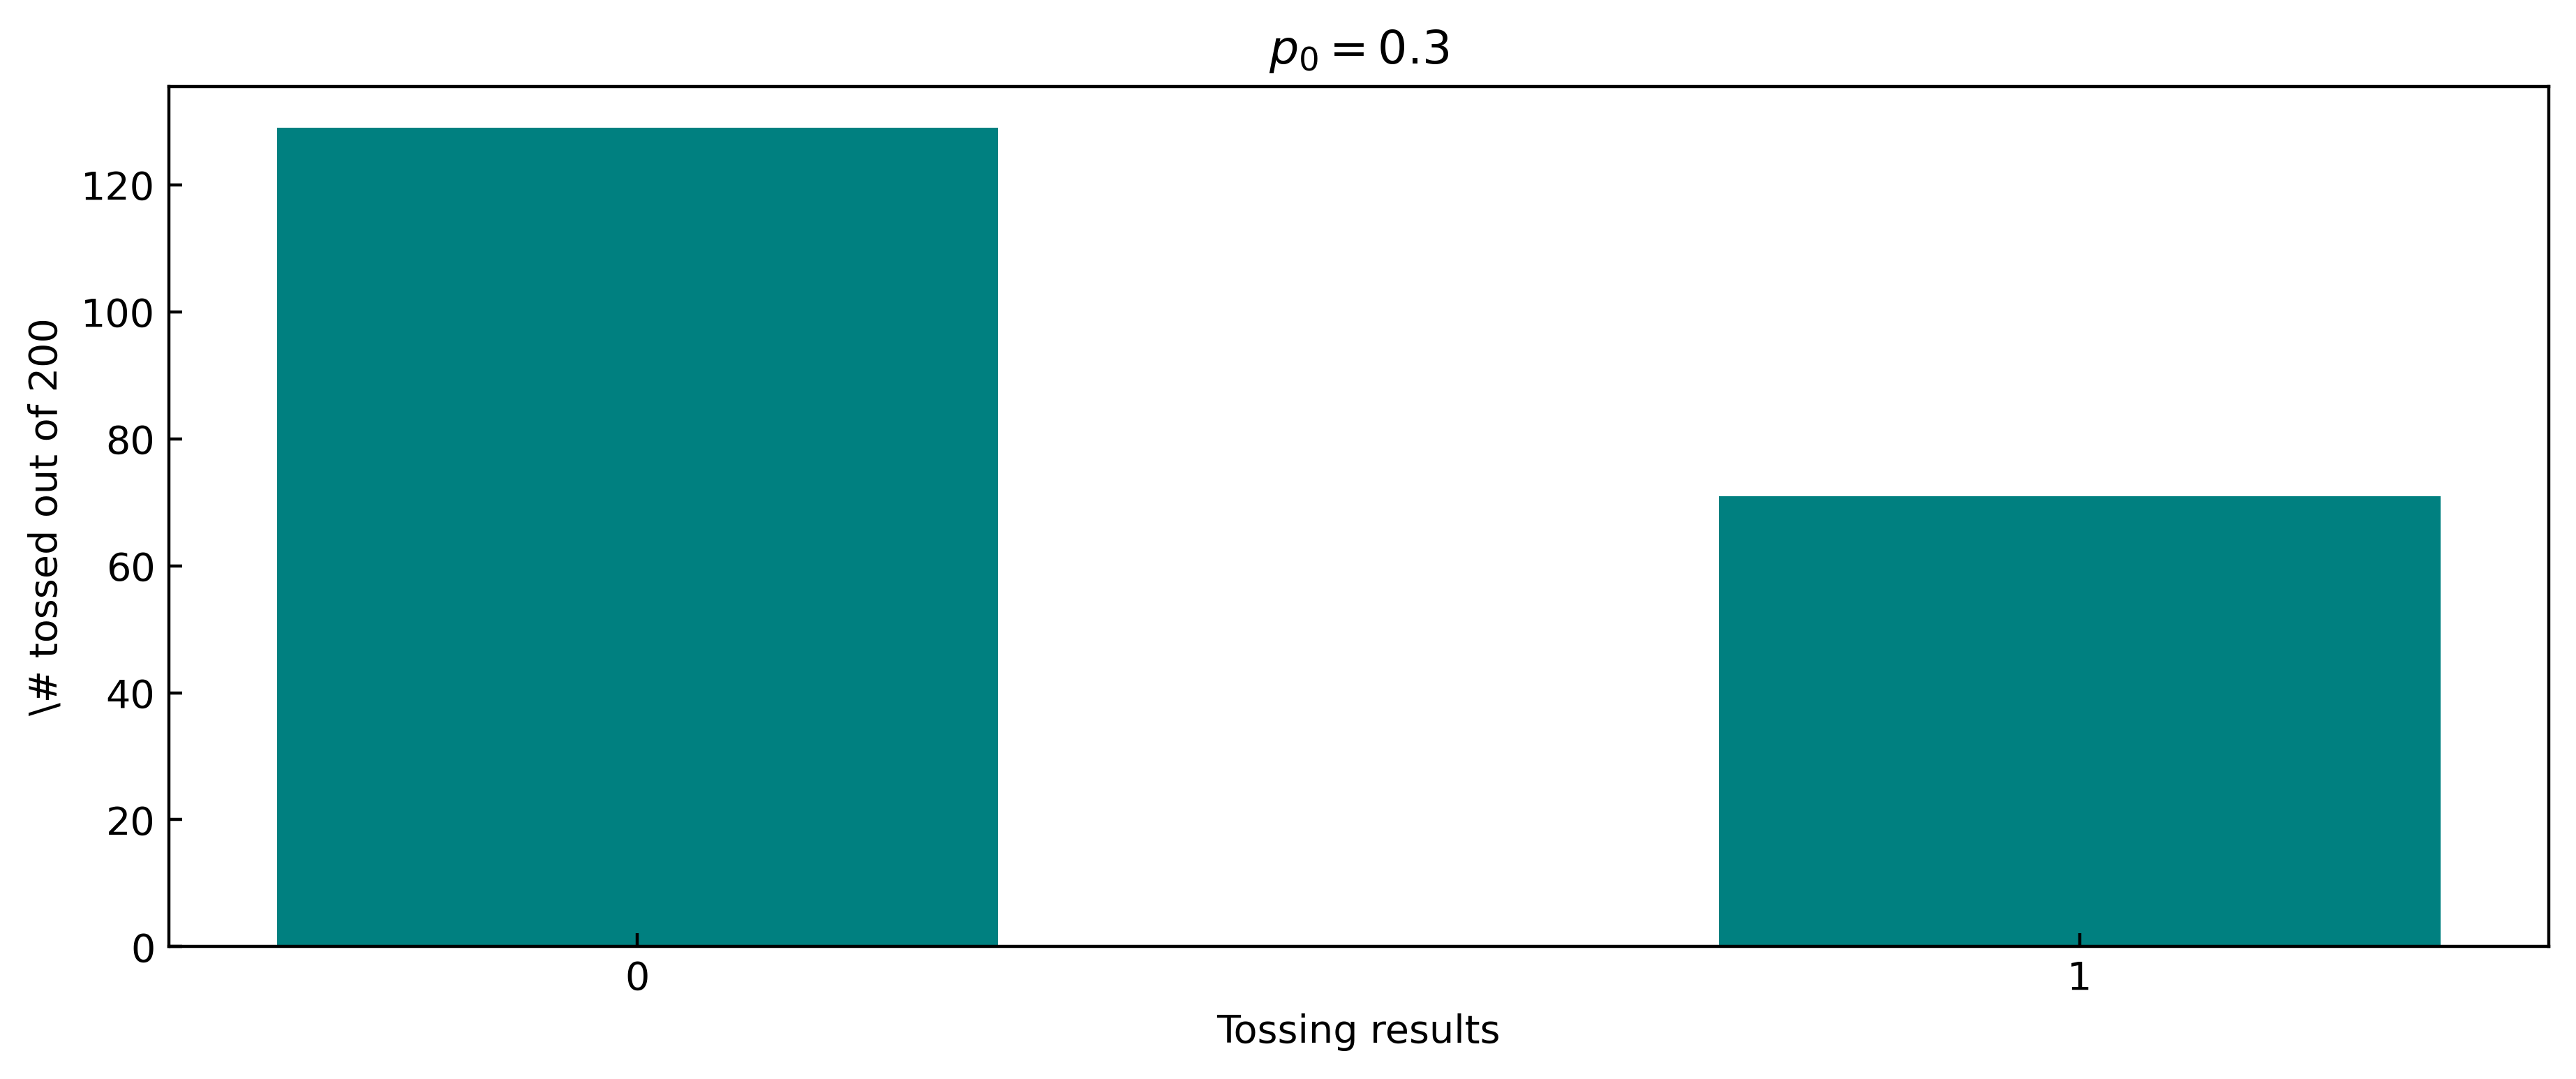

In [14]:
import matplotlib.pyplot as plt
tosses = 200
p = 0.6
outputs = [biased_coin(p) for i in range(tosses)]
plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.hist(outputs, [-.25,.25,.75,1.25], color='teal')
print('P(0)',sum([i==0 for i in outputs])/tosses)
print('P(1)',sum([i==1 for i in outputs])/tosses)
plt.xticks([0,1], ['0', '1'])
plt.xlabel(r'Tossing results')
plt.ylabel(r'\# tossed out of '+str(tosses))
plt.title(r'$p_0 = 0.3$')
plt.show()


(b) Write an analogous function that samples a \"three-sided coin\", which yields the result 0 with probability $p_0$, 1 with probability $p_1$, and 2 with probability $1-p_0-p_1$. Plot a histogram of 200 samples of the output  for $p_0=0.2$ and $p_1 = 0.5$

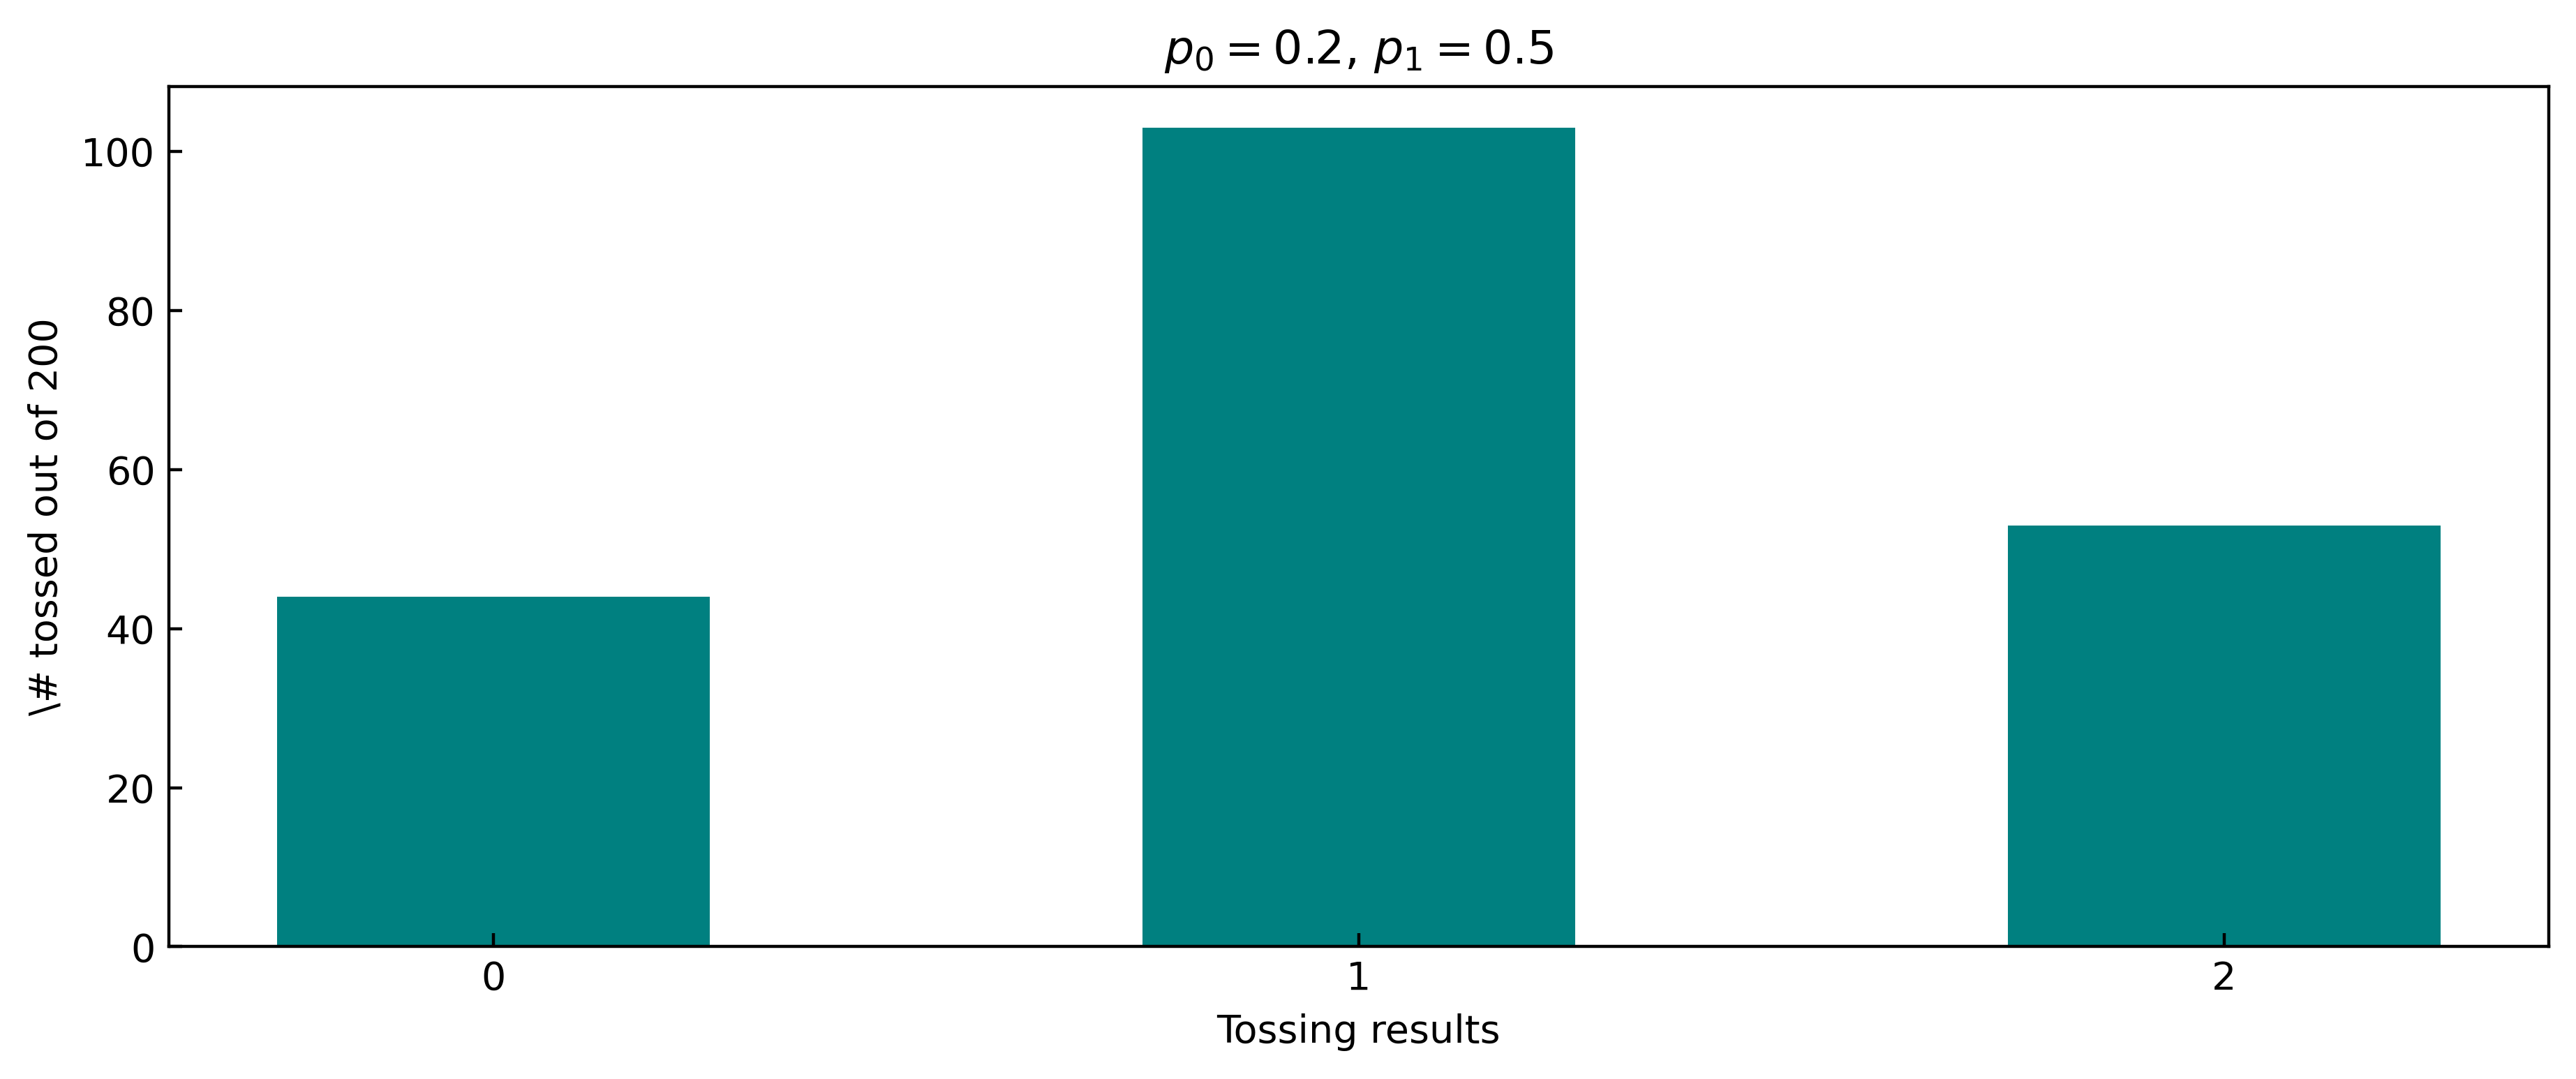

P(0) 0.22
P(1) 0.515
P(2) 0.265


In [15]:
def triple_coin(p0, p1):
    r = random()
    if r < p0:
        return 0
    elif r < p0 + p1:
        return 1
    else:
        return 2
tosses = 200
p0, p1 = .2, .5
outputs = [triple_coin(p0, p1) for i in range(tosses)]

plt.figure(figsize=(11,4), dpi=400)
plt.tick_params(axis="both", direction='in')
plt.hist(outputs, [-.25,.25,.75,1.25,1.75,2.25], color='teal')
plt.xticks([0,1,2],['0','1','2'])
plt.xlabel(r'Tossing results')
plt.ylabel(r'\# tossed out of ' + str(tosses))
plt.title(r'$p_0=0.2$, $p_1=0.5$')
plt.show()
print('P(0)', sum([i==0 for i in outputs])/tosses)
print('P(1)', sum([i==1 for i in outputs])/tosses)
print('P(2)', sum([i==2 for i in outputs])/tosses)

(c) Generalise the function to an \"$N$-sided coin\", which yields the result $i \in \{0,1,2,\ldots,N-1\}$ with probability $p_i$. Provide a histogram demonstrating that the function works as expected.

Input probabiltiies: [0.2789913015085727, 0.21982871080741076, 0.27027566928743857, 0.230904318396578]
Possible outcomes obtained: {0, 1, 2, 3}
Probabilities in numerical distribution: [0.2806, 0.2225, 0.2671, 0.2298]


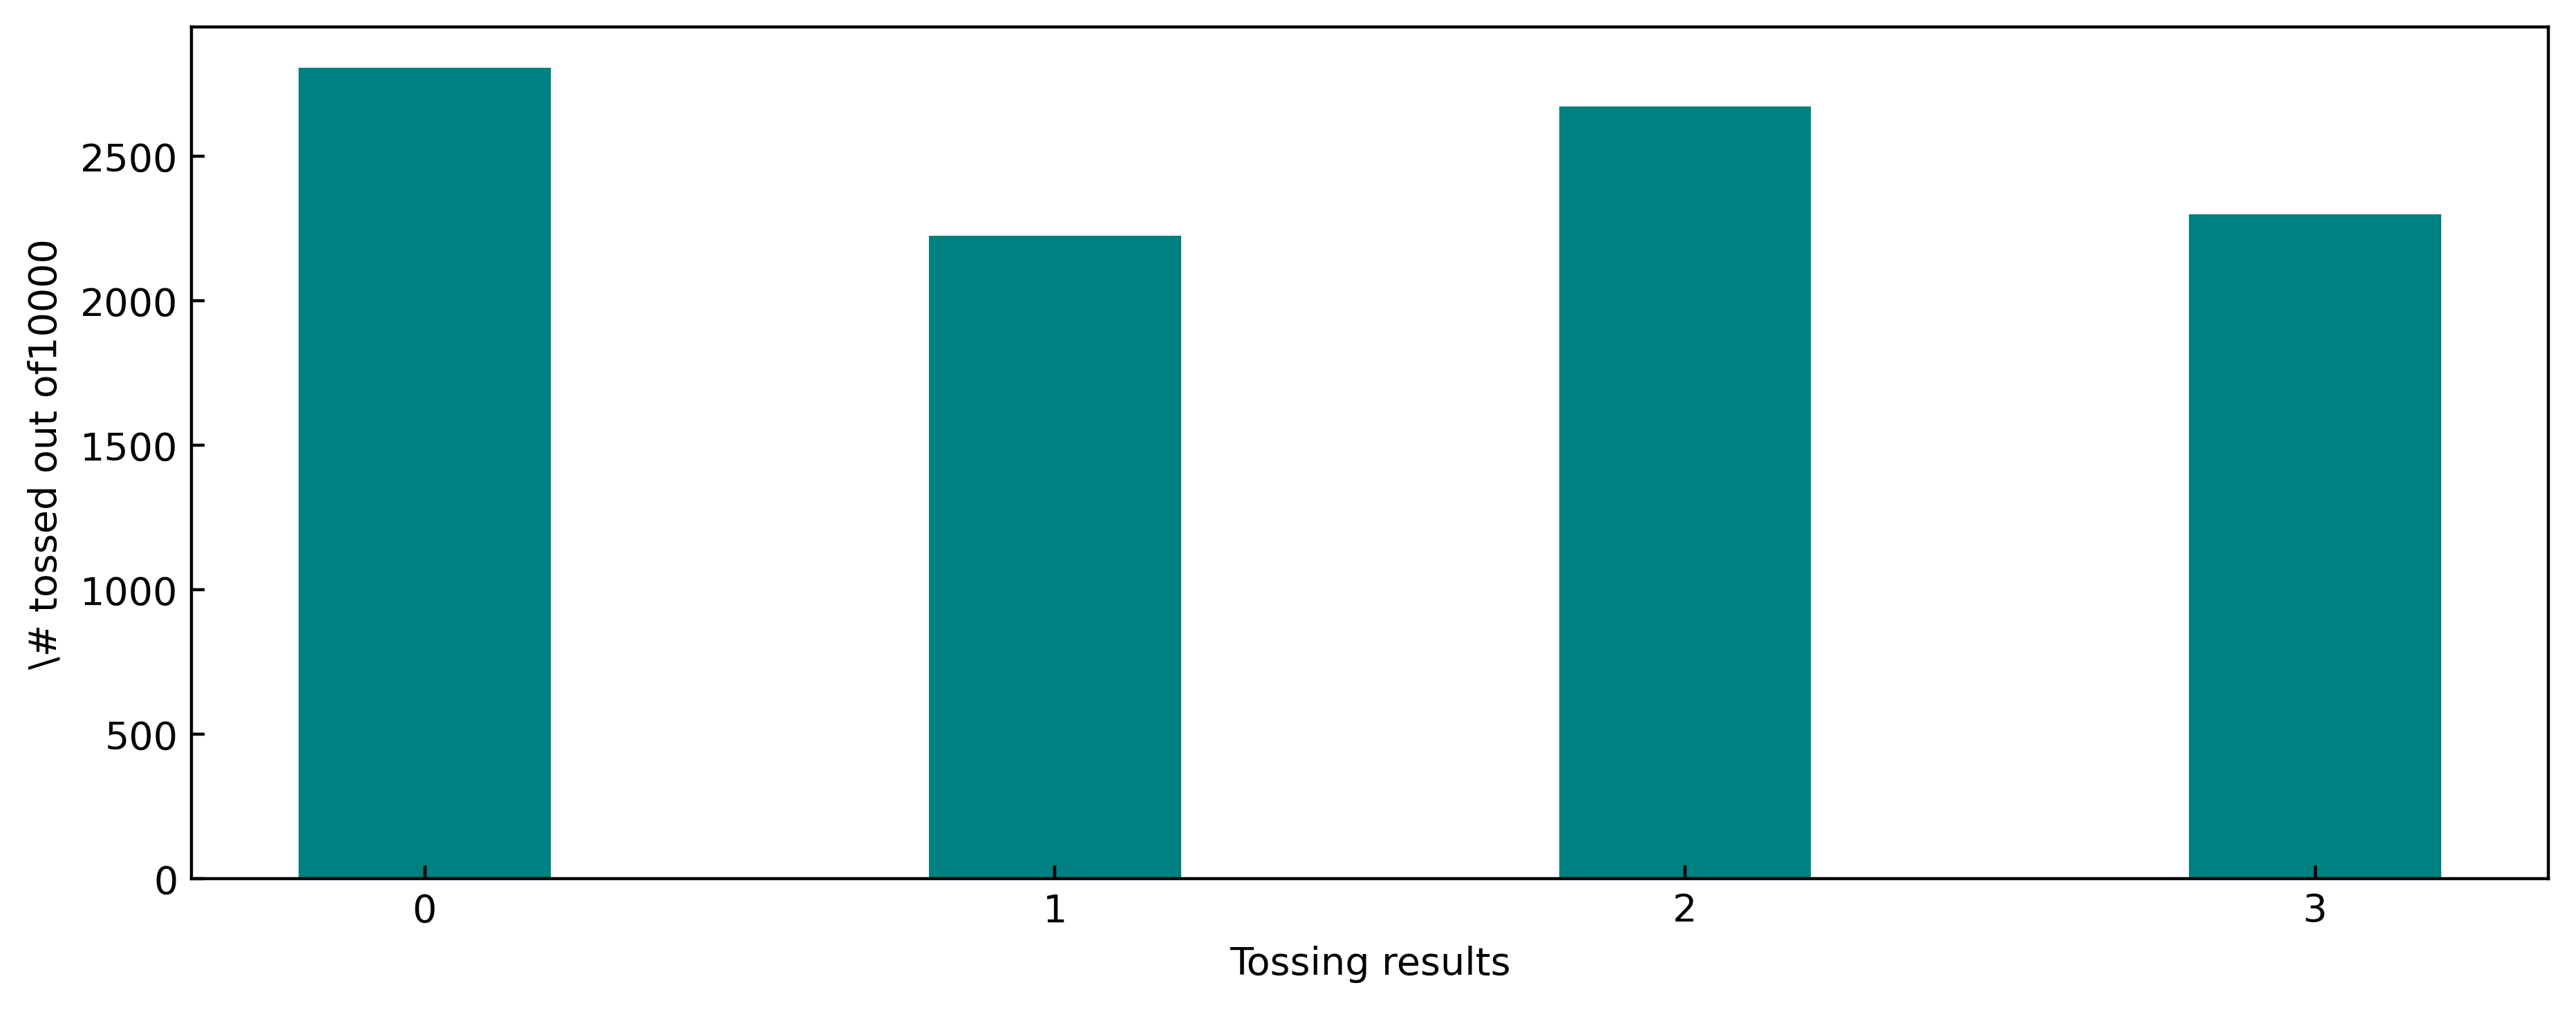

In [16]:
import numpy as np
#function returns value proportional to the number of different results
#probability of each value corresponds to every value in pn
#only works for distributions with integer outcomes
def n_coin(pn):
    r=random()
    cumulative = np.cumsum(pn)
    return sum([j<r for j in cumulative])
tosses = 10000
#a list with random probabilities created to show it works for any list of proabilities
#if longer list wanted, appended rnadom number can be divided by x>1 so that it takes longer to add probabilities up to 1
pn = []
while sum(pn) < 1:
    pn.append(random()/3)
pn = pn[:-1]
pn.append(1-sum(pn))
print('Input probabiltiies:',pn)
outputs = [n_coin(pn) for i in range(tosses)]
print('Possible outcomes obtained:',set(outputs))
print('Probabilities in numerical distribution:',[sum([j==i for j in outputs])/tosses for i in range(len(pn))])

#settings the bins position so plot looks nicer
bins = []
for i in range(len(pn)):
    bins.append(i-.2)
    bins.append(i+.2)

plt.figure(figsize=(11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.hist(outputs, bins, color='teal')
plt.xticks([i for i in range(len(pn))], [str(i) for i in range(len(pn))])
plt.xlabel(r'Tossing results')
plt.ylabel(r'\# tossed out of' + str(tosses))
plt.show()



(d) Can you generalise this to sample from a continuous probability distribution? Write a function that outputs a random number $x$ in the interval $x\in [0,1]$ according to the probability density $$ p(x) = \frac{\pi}{2} \sin(\pi x).$$ Demonstrate your function with a histogram.

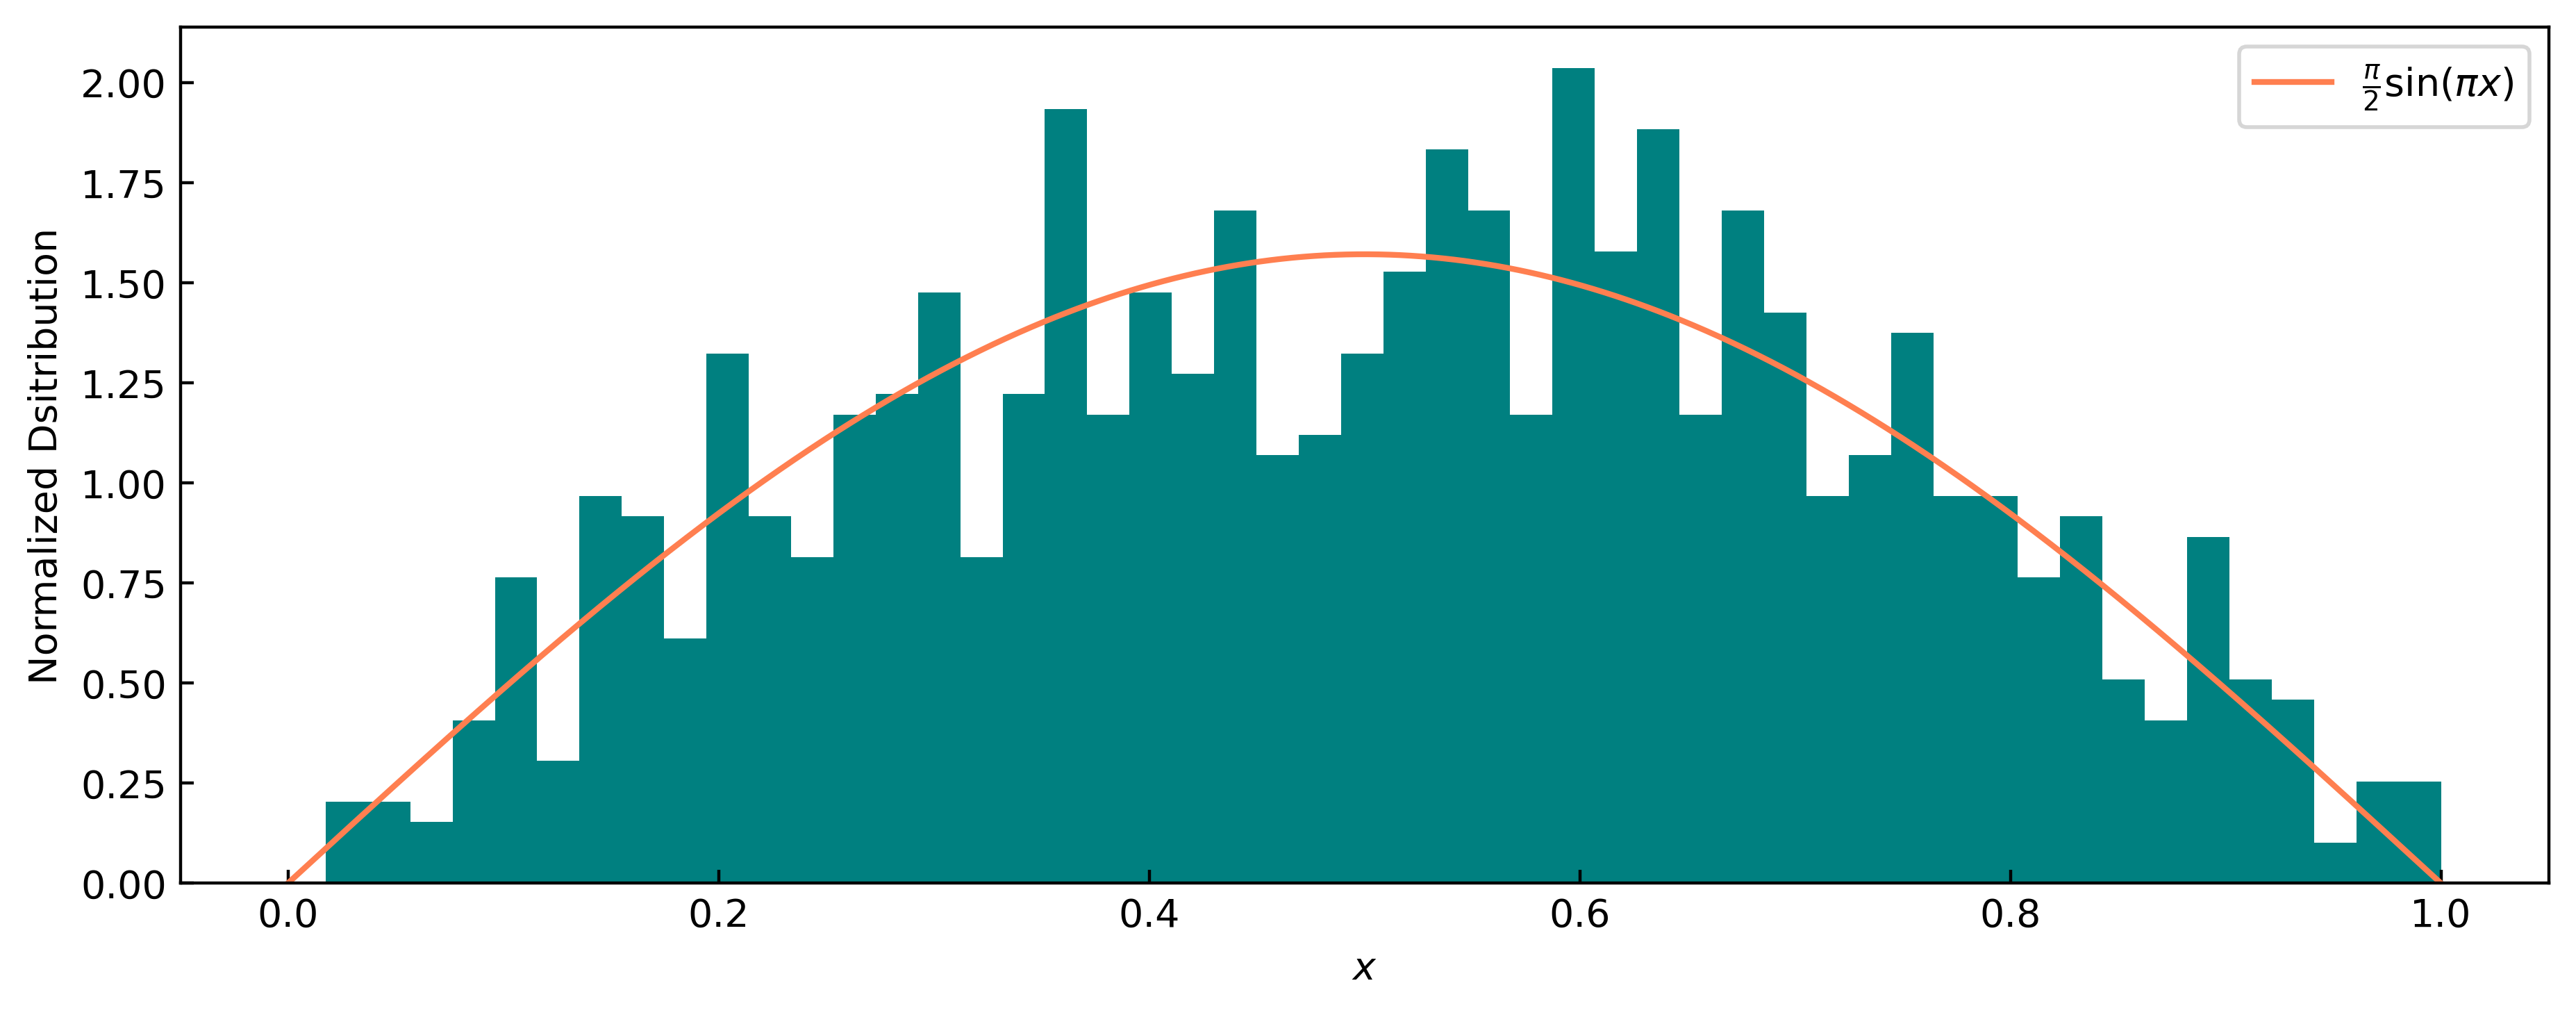

In [17]:
def prob_distribution(x):
    return np.pi/2 * np.sin(np.pi*x)
tosses = 1000
x = np.linspace(0,1,tosses)
pn = prob_distribution(x)

#similar to previous, but function makes sure input probability distribution is normalized
#outcome is not integer but number between 0 and 1

def continuous_distr(pn, size = 200):
    total_sample = []
    for i in range(size):
        r = random()
        norm = sum(pn)
        normalized_distribution = [i/norm for i in pn]
        cumulative = np.cumsum(normalized_distribution)
        sample = sum([j < r for j in cumulative])
        total_sample.append(sample)
    #normalization of the requencies
    total_sample  = [i/max(total_sample) for i in total_sample]
    return total_sample
outputs = [continuous_distr(pn, tosses)]
plt.figure(figsize=(11,4), dpi=400)
plt.tick_params(axis="both", direction='in')
plt.plot(x, pn, label=r'$\frac{\pi}{2} \sin(\pi x)$', c='coral', zorder=2)#probability distribution
plt.hist(outputs, bins=50, density=True, color='teal', zorder=1)#histogram with the sample that follows the probability distribution
plt.xlabel(r'$x$')
plt.ylabel(r'Normalized Dsitribution')
plt.legend()
plt.show()
